# Clothing Material and Heat Transfer

Kristtiya Guerra and Audrey Lee

In [27]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### The Human Body



I will set a `State` object for the initial temperature of the human body (in Kelvin).

In [28]:
meter = UNITS.meter
watt = UNITS.watt
minute = UNITS.minute
kelvin = UNITS.kelvin
celsius = UNITS.celsius

HumanTemp = 37 + 273.15 
WinterInit = State(HumanTemp=HumanTemp, dQdt = 0, 
                   top =0.41/1.136, bottom=0.21/1.136, socks=0.04/1.136, 
                   Atop=1.6*.47, Abottom=1.6*.45, Asocks=1.6*.07, rHuman=.003874)

,values
HumanTemp,310.15
dQdt,0.00


And a `System` object to contain the system parameters.

In [29]:
human = System(WinterInit=WinterInit,T_env= 5+273.15,
               t_end=0.02,
               dt=0.0007)

,values
WinterInit,HumanTemp 310.15 dQdt 0.00 dtype:...
T_env,278.15
top,0.360915
bottom,0.184859
socks,0.0352113
Atop,0.752
Abottom,0.72
Asocks,0.112
rHuman,0.003874
t_end,0.02


human = System(WinterInit=WinterInit, 
               SummerInit=SummerInit,
               LoungeInit=LoungeInit,
               DressInit=DressInit,
               Nothing=Nothing,
               T_env= 5+273.15,
               t_end=0.02,
               dt=0.0007)

In [39]:
def Clothes(state, t, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    t: time
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    HumanTemp, dQdt, top, bottom, socks, Atop, Abottom, Asocks, rHuman = state
    
    T_delta = HumanTemp - T_env
    dQdt += (system.Atop * (T_delta)/system.top) + (system.Abottom * (T_delta)/system.bottom) + (system.Asocks * (T_delta)/system.socks) + ((1.6-(system.Atop+system.Abottom+system.Asocks)) * T_delta/system.rHuman)
    dTdt = dQdt/(3500 * 70)
    HumanTemp -= dTdt
    return State(HumanTemp=HumanTemp, dQdt=dQdt,
                 top=top, bottom=bottom, socks=socks, Atop=Atop, Abottom=Abottom, Asocks=Asocks)
WinterInit

,values
HumanTemp,310.15
dQdt,0.00


In [31]:
def run_simulation(system, Clothes):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=WinterInit.index)
    frame.row[0] = WinterInit
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = Clothes(frame.row[t], t, system)

        
    # store the final temperature in T_final
    system.Q_final = get_last_value(frame.HumanTemp)
    
    return frame

In [32]:
results = run_simulation(human, Clothes)

,HumanTemp,dQdt
0.0000,310.15,0.0
0.0007,310.15,0.0
0.0014,310.15,0.0
0.0021,310.15,0.0
0.0028,310.15,0.0
0.0035,310.15,0.0
0.0042,310.15,0.0
0.0049,310.15,0.0
0.0056,310.15,0.0
0.0063,310.15,0.0


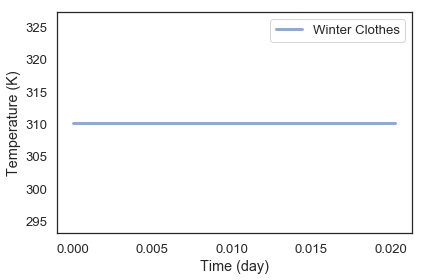

In [33]:
plot(results.HumanTemp, label='Winter Clothes')

decorate(xlabel='Time (day)',
         ylabel='Temperature (K)')